In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Day80: Drawing maps

Often in urban data, there is information about location. Today I use to draw maps. Because this is unfamiliar to me, I will use python for drawing maps (because “python” is easier to google than “R”).

### Basemap module

In [3]:
from mpl_toolkits.basemap import Basemap as Basemap

Using the [Basemap](https://matplotlib.org/basemap/api/basemap_api.html) module, we are able to draw the earth.

/Users/csiu/software/anaconda/anaconda2-4.0.0/envs/kaggle/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/csiu/software/anaconda/anaconda2-4.0.0/envs/kaggle/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


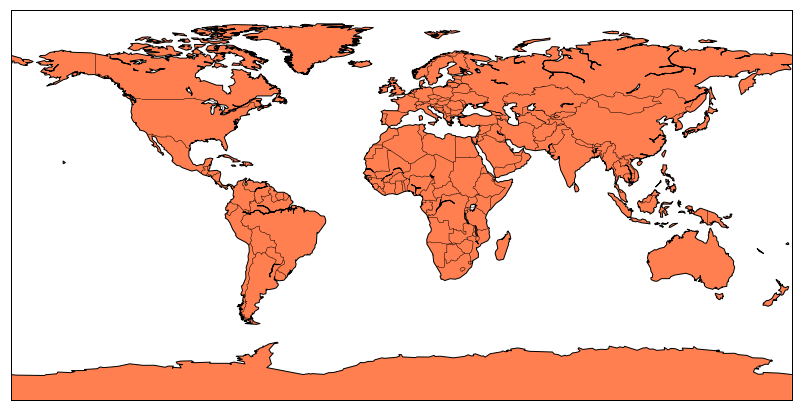

In [4]:
plt.figure(figsize=(14,8))
Map = Basemap()
Map.drawcoastlines()
Map.drawcountries()
Map.drawmapboundary()
Map.fillcontinents(color = 'coral')
plt.show()

### Orthographic projection

Example from: [Cameron Cooke's "The Big Picture"](http://cgcooke.github.io/The-Big-Picture/)

/Users/csiu/software/anaconda/anaconda2-4.0.0/envs/kaggle/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/csiu/software/anaconda/anaconda2-4.0.0/envs/kaggle/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


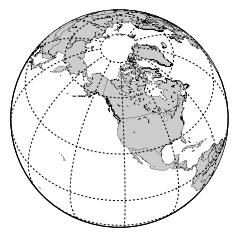

In [5]:
Map = Basemap(projection='ortho', lat_0=49, lon_0=-123, resolution='l')

# draw coastlines, country boundaries, fill continents.
Map.drawcoastlines(linewidth=0.25)
Map.drawcountries(linewidth=0.25)
Map.fillcontinents()

# draw the edge of the map projection region (the projection limb)
Map.drawmapboundary()

# draw lat/lon grid lines every 30 degrees.
Map.drawmeridians(np.arange(0,360,30))
Map.drawparallels(np.arange(-90,90,30))

plt.show()

### Mercator projection

Let say we want to map Vancouver, BC (as drawn in a traditional 2D map)

In [7]:
# Coordinates for Vancouver, BC
Van_lon = -123.1207
Van_lat = 49.2827

The following code is based off of [Bill Mill's "Simple maps in Python"](https://github.com/BillMills/python-mapping)

/Users/csiu/software/anaconda/anaconda2-4.0.0/envs/kaggle/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/csiu/software/anaconda/anaconda2-4.0.0/envs/kaggle/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/csiu/software/anaconda/anaconda2-4.0.0/envs/kaggle/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/csiu/software/anaconda/anaconda2-4.0.0/envs/kaggle/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http:

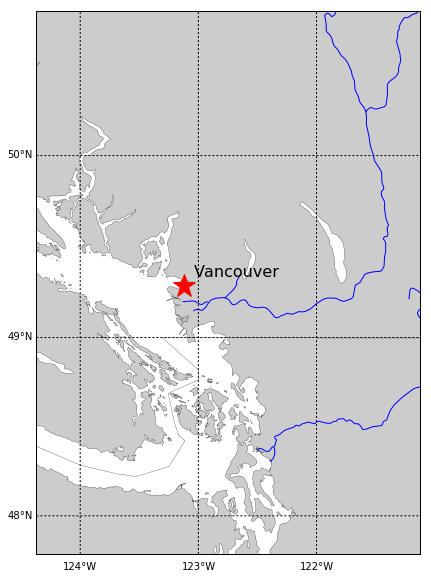

In [34]:
plt.figure(figsize=(20,10))

Map = Basemap(
    projection='merc', resolution='h', area_thresh=0.1,
    lat_0=Van_lat, lon_0=Van_lon, 
    llcrnrlat=Van_lat-1.5, llcrnrlon=Van_lon-1.25,
    urcrnrlat=Van_lat+1.5, urcrnrlon=Van_lon+2
)

# draw coastlines, country boundaries, fill continents.
Map.drawcoastlines(linewidth=0.25)
Map.drawcountries(linewidth=0.25)
Map.fillcontinents()

# draw the edge of the map projection region (the projection limb)
Map.drawmapboundary()

# draw rivers
Map.drawrivers(color='b', linewidth=1)

# draw lat/lon grid lines
Map.drawmeridians([int(Van_lon+i) for i in range(-1,3,)], labels=[1,0,0,1])
Map.drawparallels([int(Van_lat+i) for i in range(-1,3,)], labels=[1,0,0,1])

# label Vancouver
x,y = Map(Van_lon, Van_lat)
Map.plot(x, y, 'r*', markersize=24)
plt.annotate('Vancouver', xy=(x,y), xytext=(10,10), textcoords='offset points', fontsize=16)

plt.show()